# Example for Applying and Customizing Stainnorm

*Note*: This notebook assumes that `tiatoolbox` has already been installed. If it isn't, you can install it to your python environment by following guideline from https://github.com/TIA-Lab/tiatoolbox .

Welcome to tiatoolbox. 

We start by importing some related libraries.

In [1]:
import cv2
from tiatoolbox.dataloader.slide_info import slide_info
from tiatoolbox.dataloader import wsireader
import requests
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 150 # for high resolution figure in notebook

In [2]:
data_dir = './'
sample_file_name = 'sample_wsi_small.svs'

user_sample_wsi_path = None

def download(url_path, save_path):
    r = requests.get(url_path)
    with open(save_path, "wb") as f:
        f.write(r.content)
    return

user_sample_wsi_path = None

if user_sample_wsi_path is None:
    sample_wsi_path = '%s/%s' % (data_dir, sample_file_name)
else:
    sample_wsi_path = user_sample_wsi_path
if not os.path.exists(sample_wsi_path):
    url_path = "http://openslide.cs.cmu.edu/download/openslide-testdata/Aperio/CMU-1-Small-Region.svs"
    download(url_path, sample_wsi_path)

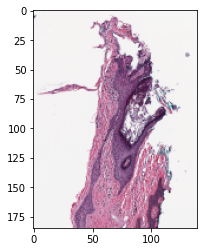

In [3]:
# create a file handler
wsi_reader = wsireader.OpenSlideWSIReader(
                input_path=sample_wsi_path)
wsi_thumb = wsi_reader.get_thumbnail(resolution=1.25, units='power')

plt.imshow(wsi_thumb)
plt.show()


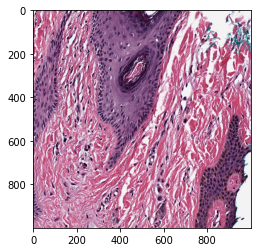

In [4]:
sample = wsi_reader.read_region(
            location=[800, 1800], # in X, Y
            level=0, size=[1000, 1000])
plt.imshow(sample)
plt.show()


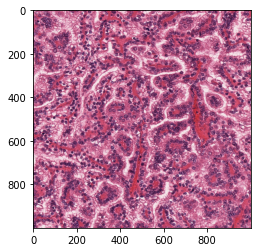

In [5]:
# downloading the target image
# url_path = "http://openslide.cs.cmu.edu/download/openslide-testdata/Aperio/CMU-1-Small-Region.svs"
# download(url_path, sample_wsi_path)

target_image = cv2.imread('target.tif')
target_image = cv2.cvtColor(target_image, cv2.COLOR_BGR2RGB)
plt.imshow(target_image)
plt.show()

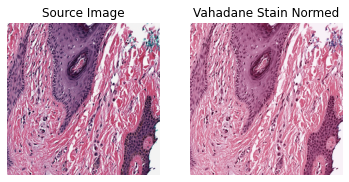

In [6]:
from tiatoolbox.tools import stainnorm

stain_normalizer = stainnorm.VahadaneNormaliser()
stain_normalizer.fit(target_image)

normed_sample = stain_normalizer.transform(sample.copy())

plt.subplot(1,2,1)
plt.imshow(sample)
plt.title('Source Image')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(normed_sample)
plt.title('Vahadane Stain Normed')
plt.axis('off')
plt.show()


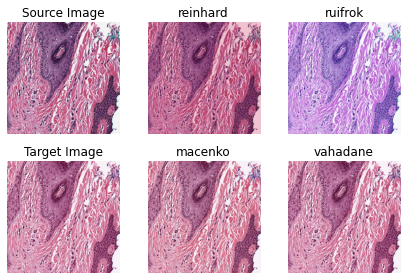

In [25]:
method_name_list = ['reinhard', 'ruifrok', 'macenko', 'vahadane']

plt.subplot(2,3,1)
plt.imshow(sample)
plt.title('Source Image')
plt.axis('off')
plt.subplot(2,3,4)
plt.imshow(normed_sample)
plt.title('Target Image')
plt.axis('off')

pos = [2, 3, 5, 6]
for idx, method_name in enumerate(method_name_list):
    stain_normalizer = stainnorm.get_normaliser(method_name)
    stain_normalizer.fit(target_image)

    normed_sample = stain_normalizer.transform(sample.copy())
    plt.subplot(2,3,pos[idx])
    plt.imshow(normed_sample)
    plt.title(method_name)
    plt.axis('off')
plt.tight_layout()
plt.show()

[[-0.42297694  1.24783103  0.17179157]
 [ 1.31456992 -0.68076182  0.40618107]]


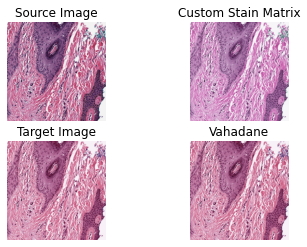

In [34]:

import skimage.color

stain_matrix = skimage.color.fgx_from_rgb[:2]
custom_normalizer = stainnorm.CustomNormaliser(stain_matrix)
custom_normalizer.fit(target_image)

vahadane_normalizer = stainnorm.VahadaneNormaliser()
vahadane_normalizer.fit(target_image)

normed_sample1 = custom_normalizer.transform(sample.copy())
normed_sample2 = stain_normalizer.transform(sample.copy())

plt.subplot(2,2,1)
plt.imshow(sample)
plt.title('Source Image')
plt.axis('off')
plt.subplot(2,2,3)
plt.imshow(normed_sample)
plt.title('Target Image')
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(normed_sample1)
plt.title('Custom Stain Matrix')
plt.axis('off')
plt.subplot(2,2,4)
plt.imshow(normed_sample2)
plt.title('Vahadane')
plt.axis('off')
plt.show()